# Model 1 With CNN

## Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from tensorflow.keras import models, layers, optimizers, losses, metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os
from pathlib import Path
import random

## Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
!ls drive/MyDrive/Dataset/

customers_dataset.csv	    order_reviews_dataset.csv		   products_dataset.csv
geolocation_dataset.csv     orders_dataset.csv			   seller_order.csv
order_items_dataset.csv     product_category_name_translation.csv  sellers_dataset.csv
order_payments_dataset.csv  product_items.csv			   skin-disease-datasaet.zip


In [ ]:
!unzip drive/MyDrive/Dataset/skin-disease-datasaet.zip

Archive:  drive/MyDrive/Dataset/skin-disease-datasaet.zip
   creating: skin-disease-datasaet/
   creating: skin-disease-datasaet/test_set/
   creating: skin-disease-datasaet/test_set/BA- cellulitis/
  inflating: skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (1).webp  
  inflating: skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (104).jpg  
  inflating: skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (106).jpg  
  inflating: skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (115).jpg  
  inflating: skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (119).jpg  
  inflating: skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (124).jpg  
  inflating: skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (135).jpg  
  inflating: skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (139).jpg  
  inflating: skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (144).jpg  
  inflating: skin-disease-da

In [ ]:
#Directory Data
train_dir = '/content/skin-disease-datasaet/train_set'
test_dir = '/content/skin-disease-datasaet/test_set'

# Initialize counters
total_train_images = 0
total_test_images = 0

# Count images in train set
print("From train_dir")
for category in os.listdir(train_dir):
    category_dir = os.path.join(train_dir, category)
    num_images = len(os.listdir(category_dir))
    print(f"Train - {category}: {num_images} images")
    total_train_images += num_images
print("")

# Count images in test set
print("From test_dir")
for category in os.listdir(test_dir):
    category_dir = os.path.join(test_dir, category)
    num_images = len(os.listdir(category_dir))
    print(f"Test - {category}: {num_images} images")
    total_test_images += num_images
print("")

# Calculate total number of images
print(f"Total train images: {total_train_images}")
print(f"Total test images: {total_test_images}")

From train_dir
Train - VI-chickenpox: 136 images
Train - FU-ringworm: 90 images
Train - PA-cutaneous-larva-migrans: 100 images
Train - BA-impetigo: 80 images
Train - VI-shingles: 130 images
Train - scar: 133 images
Train - FU-nail-fungus: 129 images
Train - FU-athlete-foot: 124 images
Train - BA- cellulitis: 136 images

From test_dir
Test - VI-chickenpox: 34 images
Test - FU-ringworm: 23 images
Test - PA-cutaneous-larva-migrans: 25 images
Test - BA-impetigo: 20 images
Test - VI-shingles: 33 images
Test - scar: 27 images
Test - FU-nail-fungus: 33 images
Test - FU-athlete-foot: 32 images
Test - BA- cellulitis: 34 images

Total train images: 1058
Total test images: 261


## Data Visualization

In [ ]:
# Train Data Classes
classes = os.listdir(train_dir)
classes = sorted(classes)
print(f"Total classes = {len(classes)}")
print(f"Classes: {classes}")

Total classes = 9
Classes: ['BA- cellulitis', 'BA-impetigo', 'FU-athlete-foot', 'FU-nail-fungus', 'FU-ringworm', 'PA-cutaneous-larva-migrans', 'VI-chickenpox', 'VI-shingles', 'scar']


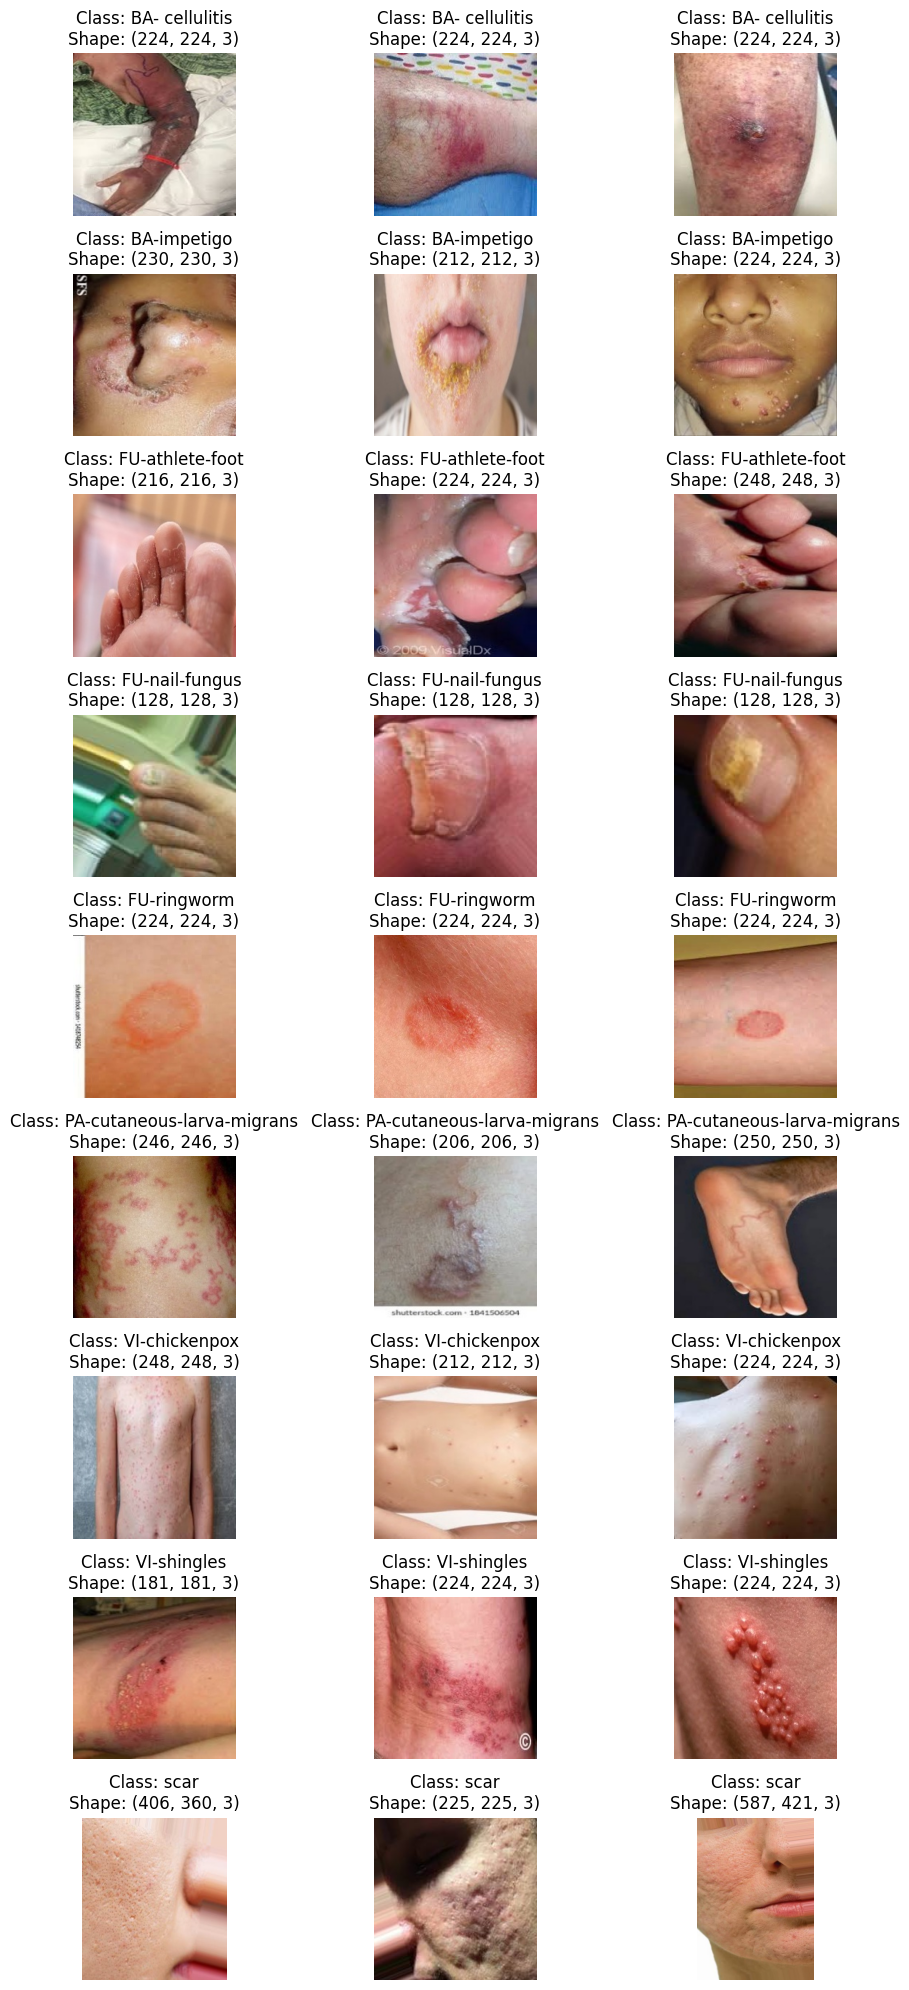

In [ ]:
NUM_OF_IMAGE = 3  # Number of images to generate

# Initialize the figure
fig, ax = plt.subplots(nrows=len(classes), ncols=NUM_OF_IMAGE, figsize=(10, 20))

# Loop through each class
for p, c in enumerate(classes):
    img_path_class = list(Path(os.path.join(train_dir, c)).glob("*.jpg"))
    img_path_class += list(Path(os.path.join(train_dir, c)).glob("*.jpeg"))

    # Check if the number of available images is less than NUM_OF_IMAGE
    if len(img_path_class) < NUM_OF_IMAGE:
        print(f"Warning: Not enough images in class '{c}' to select {NUM_OF_IMAGE} images.")
        img_selected = img_path_class  # Select all available images
    else:
        img_selected = random.choices(img_path_class, k=NUM_OF_IMAGE)

    # Loop through selected images
    for i, j in enumerate(img_selected):
        img_bgr = cv2.imread(str(j))
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        ax[p, i].imshow(img_rgb)
        ax[p, i].set_title(f"Class: {c}\nShape: {img_rgb.shape}")
        ax[p, i].axis('off')

fig.tight_layout()
plt.show()

## Building the Model

In [ ]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(9, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 128)       0

## Data Preprocessing

### Train_Data

In [ ]:
# Define your data directory
data_dir = '/content/skin-disease-datasaet'

# List all class subdirectories
class_subdirs = os.listdir(data_dir)

# Initialize empty lists for images and labels
train_images = []
train_labels = []

# Load images and labels
for class_subdir in class_subdirs:
    class_path = os.path.join(data_dir, class_subdir)
    class_images = os.listdir(class_path)
    for image_filename in class_images:
        image_path = os.path.join(class_path, image_filename)
        image = cv2.imread(image_path)  # Read the image using OpenCV
        train_images.append(image)
        train_labels.append(class_subdir)

# Convert lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Normalize pixel values (if not already done)
train_images = train_images.astype('float32') / 255

# Print the shapes of the loaded data (for verification)
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)

Train images shape: (18,)
Train labels shape: (18,)


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,              # target dir
    target_size=(150, 150), # resizes all images to 150x150
    #batch_size=20, # by default 32
    class_mode='categorical'     # Binary labels needed with binary_crossentropy loss
)



Found 1057 images belonging to 9 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print(f"Data batch shape: {data_batch.shape}")
    print(f"Labels batch shape: {labels_batch.shape}")
    break # Necessary because the generator yields batches indefinitely

Data batch shape: (32, 150, 150, 3)
Labels batch shape: (32, 9)


In [ ]:
batch_images, batch_labels = next(train_generator)


### Test_data

In [ ]:
# rescale all images by 1/255
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,              # target dir
    target_size=(150, 150), # resizes all images to 150x150
    batch_size=20,
    class_mode='categorical')    # Binary labels needed with binary_crossentropy loss


Found 260 images belonging to 9 classes.


In [ ]:
test_images, test_labels = next(test_generator)

## Model Training

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'], run_eagerly=True
)


In [ ]:
history = model.fit(
    train_generator,
    epochs=25,
    batch_size=15,
    validation_data=test_generator
    )

Epoch 1/25
34/34 [==============================] - 113s 3s/step - loss: 2.1871 - accuracy: 0.1126 - val_loss: 2.1935 - val_accuracy: 0.1308
Epoch 2/25
34/34 [==============================] - 107s 3s/step - loss: 2.1902 - accuracy: 0.1249 - val_loss: 2.1833 - val_accuracy: 0.1462
Epoch 3/25
34/34 [==============================] - 117s 3s/step - loss: 2.1586 - accuracy: 0.1343 - val_loss: 2.1071 - val_accuracy: 0.1962
Epoch 4/25
34/34 [==============================] - 113s 3s/step - loss: 2.1151 - accuracy: 0.1656 - val_loss: 2.1130 - val_accuracy: 0.1923
Epoch 5/25
34/34 [==============================] - 105s 3s/step - loss: 2.1921 - accuracy: 0.1391 - val_loss: 2.1616 - val_accuracy: 0.1615
Epoch 6/25
34/34 [==============================] - 114s 3s/step - loss: 2.1324 - accuracy: 0.1570 - val_loss: 2.1370 - val_accuracy: 0.1577
Epoch 7/25
34/34 [==============================] - 112s 3s/step - loss: 2.1192 - accuracy: 0.1410 - val_loss: 2.0986 - val_accuracy: 0.1731
Epoch 8/25
34

## Model Testing

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

1/1 [==============================] - 1s 844ms/step - loss: 1.7115 - accuracy: 0.6500


## Converting to H5 and Json

In [ ]:
# Save only the model weights to a file
model.save_weights("my_model.h5")

In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 926.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 86.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 23.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
   

In [ ]:
!tensorflowjs_converter --input_format=keras {'/content/my_model.h5'} ./

2024-06-05 11:45:03.414957: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-05 11:45:05.131652: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
import zipfile
import os

# Path to the directory containing your .bin and JSON files
directory = '/content/'

# List all files in the directory
files = os.listdir(directory)

# Filter out .bin and .json files
files_to_zip = [f for f in files if f.endswith('.bin') or f.endswith('.json')]

# Define the name for your zip file
zip_file_name = 'my_model_files.zip'

# Path to save the zip file
zip_file_path = '/content/' + zip_file_name

# Create a zip file
with zipfile.ZipFile(zip_file_path, 'w') as zipf:
    # Add each file to the zip
    for file in files_to_zip:
        zipf.write(os.path.join(directory, file), file)

print("Zip file created successfully:", zip_file_path)

Zip file created successfully: /content/my_model_files.zip
